Importing standard libraries : numpy, pandas and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Importing the Keras libraries

In [2]:
import keras
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,Input
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D

C:\Users\hareevarshan\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Loading the train dataset
dataset_train = pd.read_csv('train.csv')

Displaying the first 10 records of the training data

In [5]:
dataset_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Importing the test data

In [6]:
dataset_test = pd.read_csv('test.csv')

Displaying the first 5 records of the test data

In [7]:
dataset_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


Subsetting all the different classes of comments

In [8]:
all_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

Splitting the training data set into X_train and X_test.

Training set which comprises only the comments from the training data set.

In [9]:

X_train = dataset_train["comment_text"]

Training set which comprises the toxic, severe_toxic, obscene, threat, insult, identity_hate values for all the comments in the training data set.

In [10]:
y_train = dataset_train[all_classes].values

Test set which comprises only the comments from the test data set

In [11]:
X_test = dataset_test["comment_text"]

Setting the number of features(unique words) as 50000. Breaking down the sentences into individual unique words and assign an id to them using the Keras Tokenizer library.

In [12]:
max_features = 50000
tokenizer = Tokenizer(num_words=max_features)

In [13]:
tokenizer.fit_on_texts(list(X_train))

In [14]:
tokenizer

In [15]:
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)

In [16]:
len(list_tokenized_train)

159571

In [17]:
list_tokenized_train[0]

[688,
 75,
 1,
 126,
 130,
 177,
 29,
 672,
 4511,
 12052,
 1116,
 86,
 331,
 51,
 2278,
 11448,
 50,
 6864,
 15,
 60,
 2756,
 148,
 7,
 2937,
 34,
 117,
 1221,
 15190,
 2825,
 4,
 45,
 59,
 244,
 1,
 365,
 31,
 1,
 38,
 27,
 143,
 73,
 3462,
 89,
 3085,
 4583,
 2273,
 985]

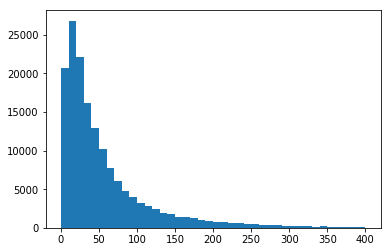

In [18]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

Padding the sentences to a maximum length of 150 words.

In [19]:
maxlen = 150
pad_train = pad_sequences(list_tokenized_train, maxlen=maxlen)
pad_test = pad_sequences(list_tokenized_test, maxlen=maxlen)

Input layer for the neural network

In [20]:
input = Input(shape=(maxlen, ))

Passing the input to the embedding layer. Projecting the words in vector space.

In [21]:
embed_size = 128
x = Embedding(max_features, embed_size)(input)

Feeding the above to the LSTM layer. 

In [22]:
x = LSTM(50, return_sequences=True)(x)

In [23]:
x.shape

TensorShape([Dimension(None), Dimension(None), Dimension(50)])

Reshaping the 3D tensor into 2D

In [24]:
x = GlobalMaxPool1D()(x)

In [25]:
x.shape

TensorShape([Dimension(None), Dimension(50)])

Dropout layer to drop 20% of the nodes

We have defined the Dense layer to produce a output dimension of 50. Relu is the activation funtion for the hidden states

In [26]:
x = Dropout(0.2)(x)

In [27]:
x = Dense(50, activation="relu")(x)

In [28]:
x = Dropout(0.2)(x)

In [29]:
x = Dense(50, activation="relu")(x)

In [30]:
x = Dropout(0.2)(x)

Finally, we feed the output into a Sigmoid layer. Has 6 nodes because we have 6 ways to classify the comments.

In [31]:
x = Dense(units = 6, activation="sigmoid")(x)

Initializing and compiling the model

In [32]:
classifier = Model(inputs=input, outputs=x)

In [33]:
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Fitting the classifier model

In [34]:
classifier.fit(pad_train,y_train, batch_size=32, epochs=2,validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/2
143613/143613 [==============================] - 666s 5ms/step - loss: 0.0700 - acc: 0.9774 - val_loss: 0.0502 - val_acc: 0.9818
Epoch 2/2
143613/143613 [==============================] - 666s 5ms/step - loss: 0.0458 - acc: 0.9830 - val_loss: 0.0503 - val_acc: 0.9809


Predicting the test set

In [35]:
y_test = classifier.predict(pad_test)

In [36]:
y_test[0]

array([0.9880223 , 0.3184288 , 0.8691105 , 0.11955243, 0.809233  ,
       0.26296481], dtype=float32)

In [37]:
rnn_final = pd.read_csv('sample_submission.csv')
rnn_final[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]] = y_test


In [38]:
rnn_final.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.988022,3.184288e-01,0.869111,0.119552,0.809233,0.262965
1,0000247867823ef7,0.003118,1.233281e-09,0.000095,0.000001,0.000082,0.000005
2,00013b17ad220c46,0.004566,3.191909e-09,0.000138,0.000002,0.000135,0.000009
3,00017563c3f7919a,0.006162,1.001057e-08,0.000296,0.000004,0.000218,0.000015
4,00017695ad8997eb,0.009308,1.514637e-08,0.000350,0.000006,0.000337,0.000022


In [39]:
rnn_final.to_csv('final_text_RNN.csv', index=False)